## 案例2:使用PCA进行图像的降维，k=36
## 数据集：data/ex7faces.mat

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [10]:
mat = sio.loadmat('data/ex7faces.mat')
X = mat['X']
print(X.shape)

(5000, 1024)


In [11]:
def plot_100_images(X):
    fig, axs = plt.subplots(ncols=10, nrows=10, figsize=(10,10))
    for c in range(0,10):
        for r in range(0,10):
            #显示单通道的灰度图
            axs[c,r].imshow(X[10*c + r].reshape(32,32).T,cmap = 'Greys_r') 
            axs[c,r].set_xticks([])
            axs[c,r].set_yticks([])
            

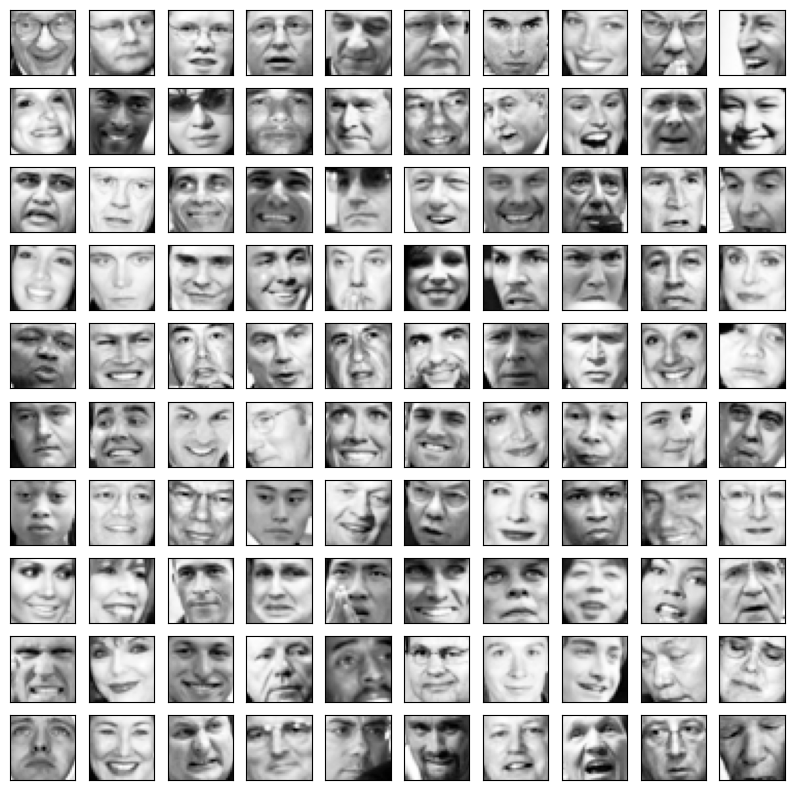

In [12]:
plot_100_images(X)

In [13]:
means = np.mean(X,axis=0)
X_demean = X - means
C = X_demean.T @ X_demean
U,S,V = np.linalg.svd(C)

U,S,V

(array([[-0.0204473 , -0.04609067, -0.03992254, ...,  0.00079388,
          0.00059184,  0.00071196],
        [-0.02082927, -0.04794968, -0.04100448, ..., -0.00142192,
         -0.00163027, -0.00177332],
        [-0.02088808, -0.04946636, -0.04327971, ...,  0.00790348,
          0.00054428,  0.0015138 ],
        ...,
        [-0.01429868,  0.04182147, -0.07918063, ..., -0.00302163,
          0.00403281,  0.00483352],
        [-0.01279079,  0.03972965, -0.0791031 , ...,  0.00043317,
         -0.00190278, -0.00177217],
        [-0.01186197,  0.03786644, -0.07711544, ...,  0.00229648,
          0.00057428,  0.00074233]]),
 array([2.55730972e+09, 1.15766947e+09, 5.59925540e+08, ...,
        1.72723720e+03, 1.63041943e+03, 1.57351640e+03]),
 array([[-0.0204473 , -0.02082927, -0.02088808, ..., -0.01429868,
         -0.01279079, -0.01186197],
        [-0.04609067, -0.04794968, -0.04946636, ...,  0.04182147,
          0.03972965,  0.03786644],
        [-0.03992254, -0.04100448, -0.04327971, ..

In [29]:
U1 = U[:,:36]
X_reduction = X_demean @ U1
X_reduction.shape

(5000, 36)

In [30]:
X_recover = X_reduction @ U1.T   +   means

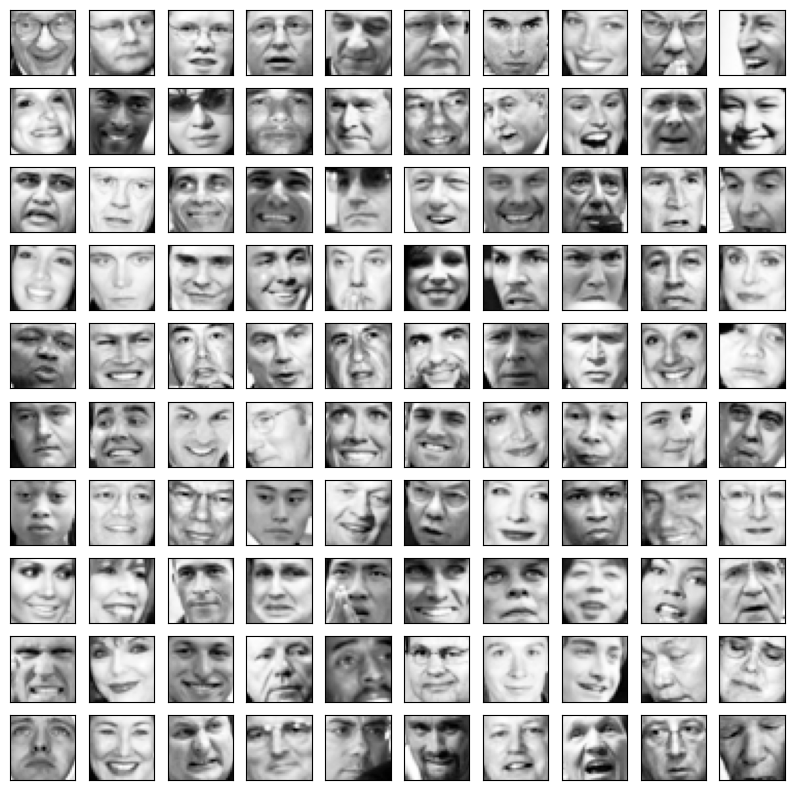

In [31]:
# 初始的图像， 原始未处理的 图像
plot_100_images(X)   



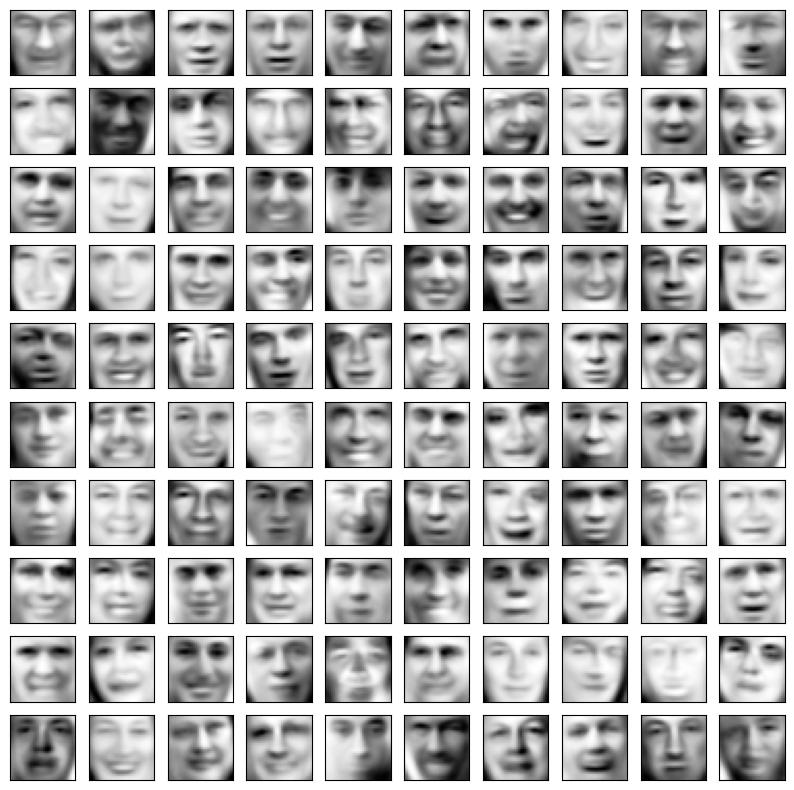

In [32]:
# PCA 降噪之后的图像， 降噪的同时 也去除了一部分特征，因此分辨率下降
plot_100_images(X_recover) 

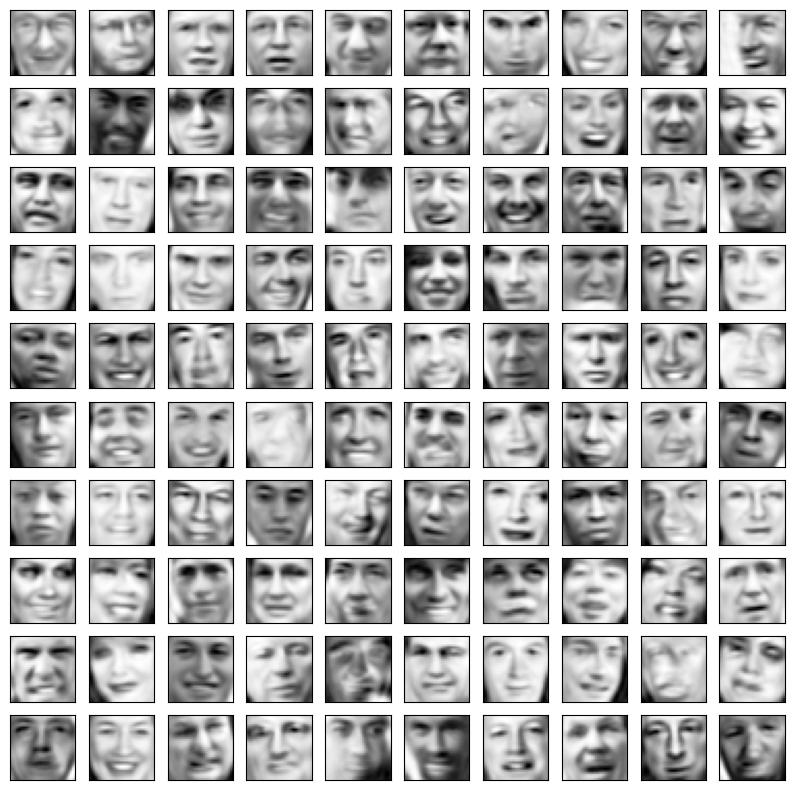

In [33]:
# PCA 降噪之后的图像， 降噪的同时 也去除了一部分特征，因此分辨率下降
# 取前 100 个特征向量，特征向量越多，恢复效果越好， 相比于 36个特征向量好蛮多的

U2 = U[:,:100]
X_reduction = X_demean @ U2
X_reduction.shape

X_recover2 = X_reduction @ U2.T   +   means

plot_100_images(X_recover2) 